# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = weather_api_key

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

In [8]:
print('Beginning Data Retrieval')     
print('-----------------------------')
i=0 

for city in cities:
    #print(f"query_url is : {query_url}")
    response = requests.get(query_url + city).json()
    #print(f"response is : {response}")
    cod = response['cod']
    if cod == 200: 
        i = i + 1
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f'Processing Record {i} of Set 1 | {city}')
    else:
        print(f'City not found. Skipping...')
    
print(f'-----------------------------')
print(f'Data Retrieval Complete     ')
print(f'-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | egvekinot
Processing Record 4 of Set 1 | llanes
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | alta floresta
Processing Record 8 of Set 1 | norman wells
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | navahrudak
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | semporna
Processing Record 19 of Set 1 | vaini
City not found. Skipping...
Processing Record 20 of Set 1 | kyshtovka
Processing Record 21 of Set 1 | buraydah
Processing Record 22 of Set 1 | caucaia
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# create a data frame from retreived weather data
weather_dict = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('WeatherPy_data.csv')

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yellowknife,100,CA,1661727042,82,62.4560,-114.3525,14.29,5.66
1,Ushuaia,40,AR,1661727043,70,-54.8000,-68.3000,6.81,2.06
2,Egvekinot,43,RU,1661726749,69,66.3167,-179.1667,8.96,2.04
3,Llanes,38,ES,1661727043,71,43.4198,-4.7549,23.50,1.49
4,East London,79,ZA,1661727044,77,-33.0153,27.9116,16.85,7.37


In [14]:
# Save csv file
weather_data.to_csv("Weather_Data.csv", index=False)
weather_data.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
# Save csv file
weather_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,565.000000,5.650000e+02,565.000000,565.000000,565.000000,565.000000,565.000000
mean,52.968142,1.661727e+09,71.633628,19.376568,14.184208,19.831469,3.419186
std,39.437792,9.095612e+01,19.800475,33.127588,90.545956,7.963798,2.337133
min,0.000000,1.661726e+09,6.000000,-54.800000,-179.166700,-1.550000,0.000000
25%,11.000000,1.661727e+09,63.000000,-7.381700,-69.218100,13.250000,1.610000
50%,55.000000,1.661727e+09,77.000000,22.877900,19.234500,21.170000,2.790000
75%,96.000000,1.661727e+09,85.000000,46.485600,92.750000,25.930000,4.630000
max,100.000000,1.661727e+09,100.000000,78.218600,179.316700,37.930000,13.250000


In [16]:
#  Get the indices of cities that have humidity over 100%.
humid_city_data = weather_data[(weather_data["Humidity"] > 100)].index
                                  
humid_city_data

Int64Index([], dtype='int64')

In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(humid_city_data, inplace=False)
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yellowknife,100,CA,1661727042,82,62.4560,-114.3525,14.29,5.66
1,Ushuaia,40,AR,1661727043,70,-54.8000,-68.3000,6.81,2.06
2,Egvekinot,43,RU,1661726749,69,66.3167,-179.1667,8.96,2.04
3,Llanes,38,ES,1661727043,71,43.4198,-4.7549,23.50,1.49
4,East London,79,ZA,1661727044,77,-33.0153,27.9116,16.85,7.37


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

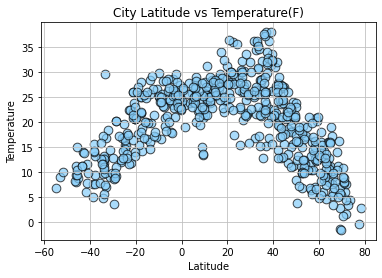

In [19]:
plt.figure(figsize = (6, 4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], s=75, c="lightskyblue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Temperature(F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

#save the plot
plt.savefig('lat_v_temp.png')
plt.show()

## Latitude vs. Humidity Plot

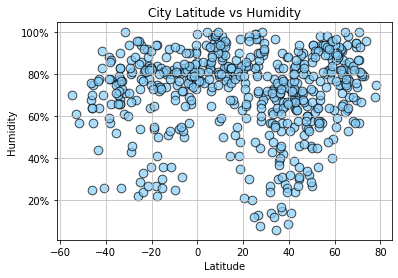

In [20]:
#build a scatter plot based on the columns Latitude and humidity
plt.figure(figsize = (6,4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], s=75, c="lightskyblue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 

#save the plot
plt.savefig('lat_v_hum.png')
plt.show()

## Latitude vs. Cloudiness Plot

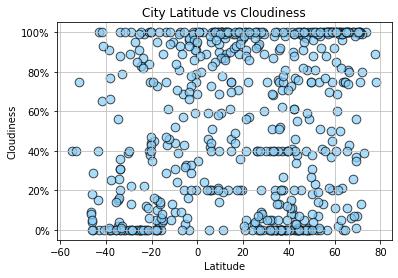

In [21]:
#build a scatter plot based on the columns Latitude and cloudiness
plt.figure(figsize = (6, 4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], s=75, c="lightskyblue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

#save the plot
plt.savefig('lat_v_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

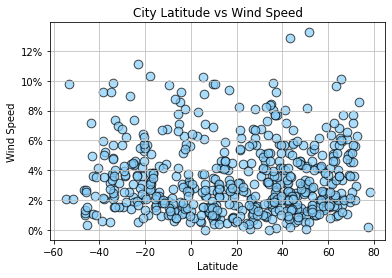

In [22]:
#build a scatter plot based on the columns Latitude and wind speed
plt.figure(figsize = (6, 4))
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], s=75, c="lightskyblue", edgecolors='k', alpha=0.7)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

#save the plot
plt.savefig('lat_v_wind.png')
plt.show()

## Linear Regression

In [23]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [24]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = weather_data.loc[(weather_data["Lat"] >= 0)]
southern_hemi_df = weather_data.loc[(weather_data["Lat"] < 0)]

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6204715374150114


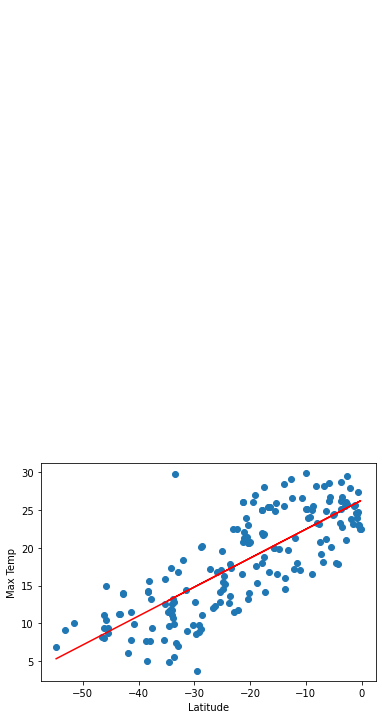

In [25]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0016408888648215046


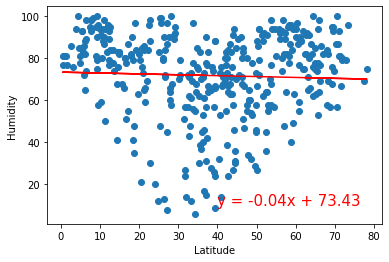

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.019525922280126357


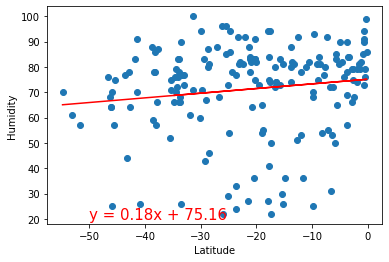

In [27]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 6.153129878435722e-06


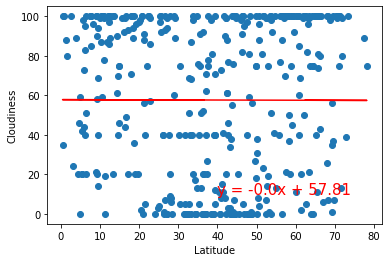

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08538100300027036


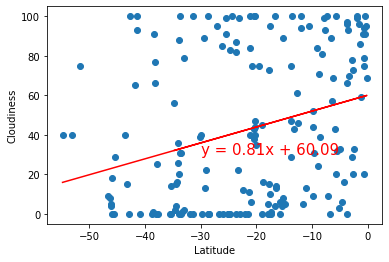

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.009829109680370268


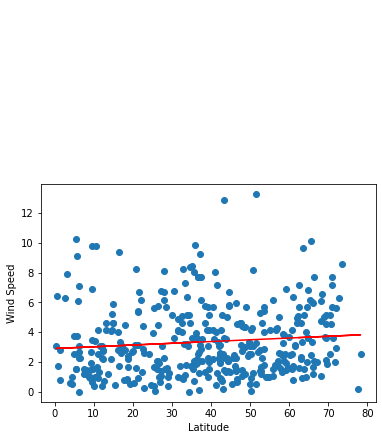

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0017352985783681367


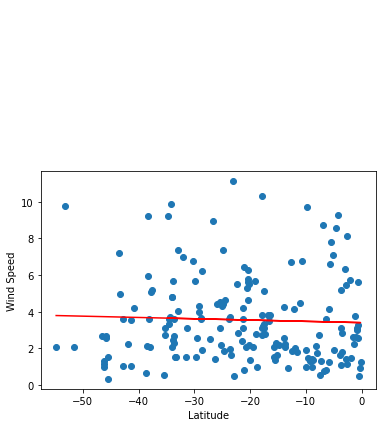

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))